# Scatterplots and Correlation
> ```Quanti```tative vs. ```Quanti```tative

#### 使用的工具
> - [plt.scatter()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [sns.regplot()](https://seaborn.pydata.org/generated/seaborn.regplot.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fuel_df = pd.read_csv('./fuel-econ.csv')
fuel_df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### Engine displacement (liter) vs. Overall fuel mileage (miles per gallon)

#### plt.scatter()

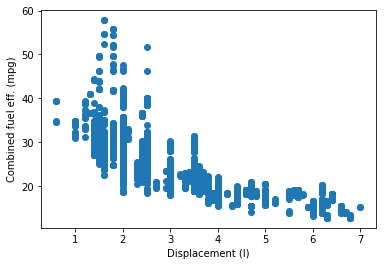

In [2]:
plt.scatter(data=fuel_df, x='displ', y='comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)');

#### sns.regplot()
> By default, the regression function is linear, and includes a shaded confidence region for the regression estimate.

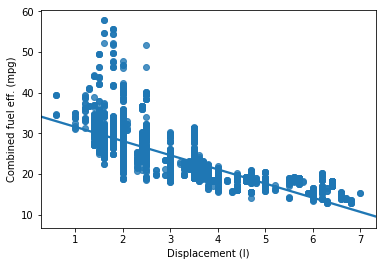

In [3]:
sns.regplot(data=fuel_df, x='displ', y='comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)');

#### Note:
There might be $log(y) ∝ x$ relationship (that is, linear increases in the value of x are associated with linear increases in the log of y) in the data.  

If we want to plot the regression line on the observed relationship in the data, we need to transform the data.
``` python
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(df['num_var1'], df['num_var2'].apply(log_trans))
tick_locs = [10, 20, 50, 100, 200, 500]
plt.yticks(log_trans(tick_locs), tick_locs)
```

# Overplotting
> Where a plot is create with too many overlapping points or our numeric variables are discrete-valued.

Can be solved with:
1. Sampling - Randomly choose less points.
2. Transparency
3. Jitter - Add a small amount of random noise to the position of each point.

### Manufacturing year vs. Overall fuel mileage (miles per gallon)

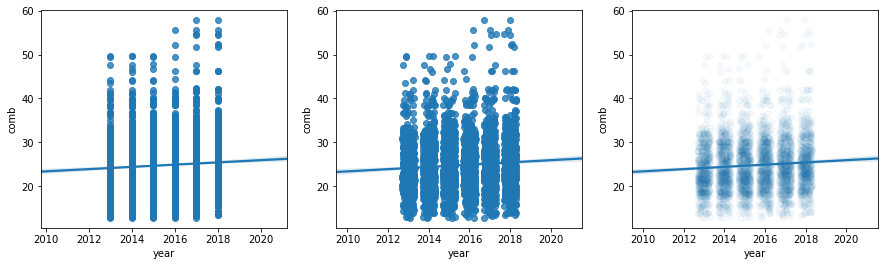

In [4]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.regplot(data=fuel_df, x='year', y='comb');
# add jitter
plt.subplot(1, 3, 2)
sns.regplot(data=fuel_df, x='year', y='comb', x_jitter=0.3);
# add transparency
plt.subplot(1, 3, 3)
sns.regplot(data=fuel_df, x='year', y='comb',
            x_jitter=0.3,
            scatter_kws = {'alpha' : 1/30});

> The right most plot is more distinguishable. Note the regression line won't affect by jitter.

# Heat map
> A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. 
- Good for discrete variable vs. discrete variable.
- Good alternative to tranceparency for a lot of data.
- Bin sizes are important!

#### 使用的工具
> - [plt.hist2d()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html)

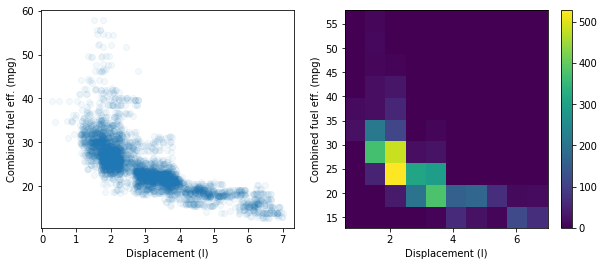

In [5]:
plt.figure(figsize=(10, 4))
# scatter plot
plt.subplot(1, 2, 1)
sns.regplot(data=fuel_df, x='displ', y='comb', x_jitter=.3, scatter_kws={'alpha': 1/20}, fit_reg=False)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)')

# heat map
plt.subplot(1, 2, 2)
plt.hist2d(data=fuel_df, x='displ', y='comb')
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)');

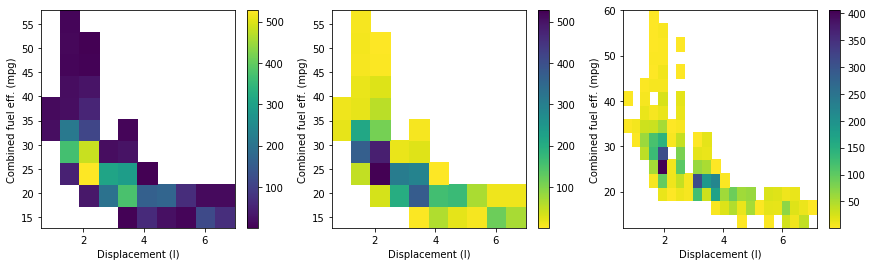

In [6]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 4, 1)
# Set minimum bound of count - distinguish cells with zero counts from those with non-zero counts
plt.hist2d(data=fuel_df, x='displ', y='comb', cmin=0.5)
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)')

# reverse the color bar
plt.subplot(1, 4, 2)
plt.hist2d(data=fuel_df, x='displ', y='comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)')

# change bins
x_bins = np.arange(0.6, 7+0.3, 0.3)
y_bins = np.arange(12, 58+3, 3)
plt.subplot(1, 4, 3)
plt.hist2d(data=fuel_df, x='displ', y='comb', cmin=0.5, cmap='viridis_r', bins=[x_bins, y_bins])
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)');

In [7]:
fuel_df[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


# Violin Plots
> ```Quanti```tative vs. ```Quali```tative
#### 使用的工具
> - [sns.violinplot()](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

### Vehicle class vs. fuel eff.

In [8]:
set(fuel_df.VClass.values)

{'Compact Cars',
 'Large Cars',
 'Midsize Cars',
 'Minicompact Cars',
 'Subcompact Cars'}

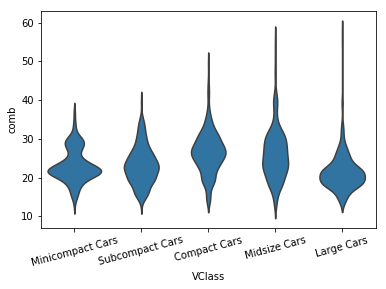

In [9]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
# convert VClass to ordered categorical types
vclasses = pd.api.types.CategoricalDtype(categories=sedan_classes, ordered=True)
fuel_df['VClass'] = fuel_df['VClass'].astype(vclasses)

# violin plot
base_color = sns.color_palette()[0]
sns.violinplot(data=fuel_df, x='VClass', y='comb', color=base_color,
               inner=None) # hide inner box plot
plt.xticks(rotation=15);

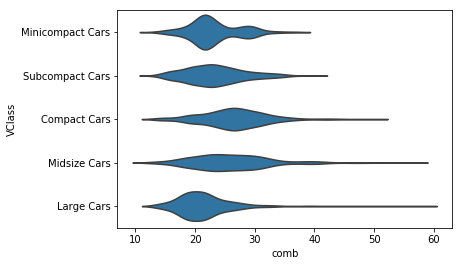

In [10]:
# change x, y for horizontal violin plot
base_color = sns.color_palette()[0]
sns.violinplot(data=fuel_df, y='VClass', x='comb', color=base_color,
               inner=None);

> For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. <br>The distribution is plotted as a kernel density estimate, something like a smoothed histogram. 

# Box Plots
> Can do a fine job of summarizing data, but some distributinal detail will get lost. (trade-off with violin plot)

#### 使用的工具
> - [sns.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

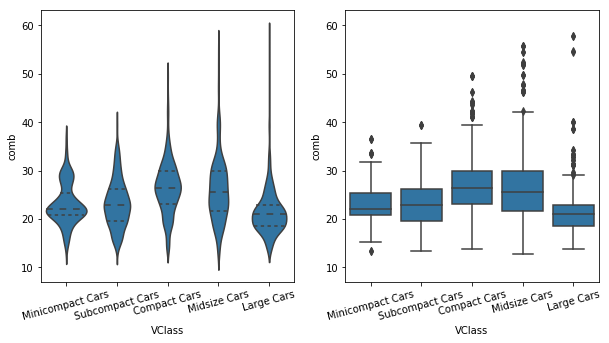

In [11]:
plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data=fuel_df, x='VClass', y='comb', color=base_color,
                     inner='quartile')
plt.xticks(rotation=15)

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=fuel_df, x='VClass', y='comb', color=base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation=15);

> Comparing the two plots, the box plot is a cleaner summary of the data than the violin plot. It's easier to compare statistics between the groups with a box plot. 
- Box plot worth more consideration if you have a lot of groups to compare, or if you are building explanatory plots.
- The violin plot may be a better option for exploration, especially since seaborn's implementation also includes the box plot by default.

# Clustered Bar Charts
> ```Quali```tative vs. ```Quali```tative

In [12]:
print(fuel_df.trans.unique())

# we want only Automatic and Manual for types
fuel_df['trans_type'] = fuel_df.trans.apply(lambda x: x.split()[0])
fuel_df['trans_type'].unique()

['Automatic (AM6)' 'Automatic (AM-S6)' 'Automatic (S6)' 'Automatic 8-spd'
 'Manual 6-spd' 'Automatic 6-spd' 'Automatic (S5)' 'Automatic 7-spd'
 'Automatic (AV-S6)' 'Automatic (S8)' 'Manual 7-spd' 'Automatic (AM-S7)'
 'Automatic (S7)' 'Automatic (variable gear ratios)' 'Manual 5-spd'
 'Automatic (AV-S8)' 'Automatic 4-spd' 'Automatic 5-spd' 'Automatic (AM7)'
 'Automatic (AV-S7)' 'Automatic 9-spd' 'Automatic (AM-S8)'
 'Automatic (A1)' 'Automatic (AM8)' 'Automatic (S9)' 'Automatic (S10)'
 'Automatic (AV-S10)']


array(['Automatic', 'Manual'], dtype=object)

### Heat map
Using [sns.heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [13]:
# prepare data frame for sns.heatmap
ct_count = fuel_df.groupby(['trans_type', 'VClass']).size()
ct_count = ct_count.reset_index(name = 'count')
ct_count = ct_count.pivot(index = 'VClass', columns = 'trans_type', values = 'count')
ct_count

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


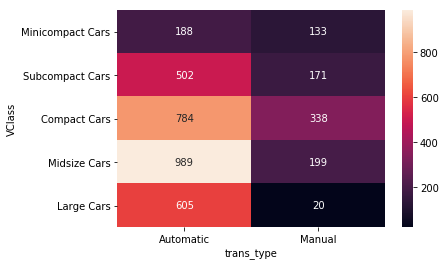

In [14]:
sns.heatmap(ct_count, annot=True, fmt='d'); # fmt = 'd' means that annotations will all be formatted as integers 

### Clustered Bar Charts
Using [sns.countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html)

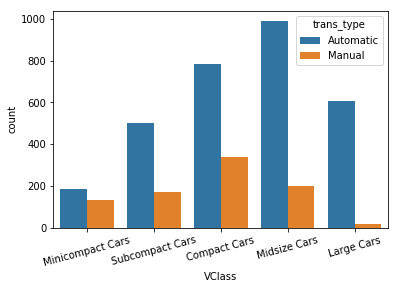

In [15]:
ax = sns.countplot(data = fuel_df, x = 'VClass', hue = 'trans_type')
plt.xticks(rotation=15);

> Clustered Bar Charts is clear than heatmap.

# Faceting
> Multiple copies of the same type of plot visualized on different subsets of data. <br>
In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. 
- Good for breaking down potentially complex patterns into small parts.
- Axis scales and limits should be consistent across each subplot.

#### 使用的工具
> - [sns.FacetGrid()](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

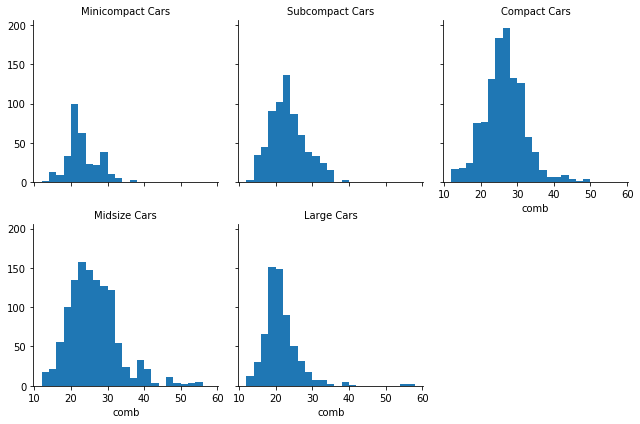

In [16]:
# Facet the violin plot we create above
g = sns.FacetGrid(data=fuel_df, col='VClass', col_wrap=3)
bins = np.arange(12, 58+2, 2)

# Don't set them as keyword arguments, like x = "num_var", or the mapping won't work properly.
g.map(plt.hist, 'comb', bins=bins)
# Set title for each subplot
g.set_titles('{col_name}');

# Adaptation of Univariate Plots
> - Histograms and bar charts depict the distribution of numeric and categorical variables, respectively, with the height (or length) of bars indicating the number of data points that fell within each bar's range of values.
- These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.
- An useful alternatives to the box plot and violin plot if the data is not conducive to either of those plot types. <br> For example, if the numeric variable is binary in nature, taking values only of 0 or 1, then a box plot or violin plot will not be informative, leaving the adapted bar chart as the best choice for displaying the data.
#### 使用的工具
> - [sns.barplot()](https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot) - Show point estimates and confidence intervals as rectangular bars.
- [sns.pointplot()](https://seaborn.pydata.org/generated/seaborn.pointplot.html) - Show point estimates and confidence intervals using scatter plot glyphs.

### Vehicle class vs. fuel eff. ( ```Quali```tative vs. ```Quanti```tative )

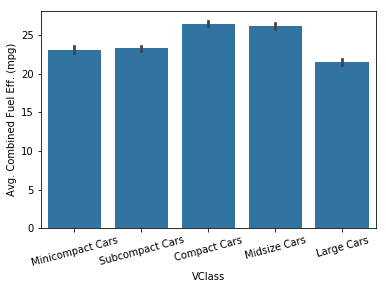

In [17]:
sns.barplot(data=fuel_df, x='VClass', y='comb', color=base_color)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)')
plt.xticks(rotation=15);

> The bar heights indicate the mean value on the numeric variable, with error bars plotted to show the uncertainty in the mean based on variance and sample size. 

#### ```pointplot``` 
> Can be used to plot the averages as points rather than bars. This can be useful if having bars in reference to a 0 baseline aren't important or would be confusing.

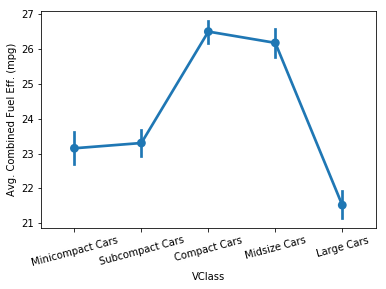

In [18]:
sns.pointplot(data=fuel_df, x='VClass', y='comb')
plt.ylabel('Avg. Combined Fuel Eff. (mpg)')
plt.xticks(rotation=15);

> Line can be removed via linestyles = "" for nominal data.